# Part 4 Clustering

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Selecting the dataset that we are interested in
X = dataset.iloc[:, [3, 4]].to_numpy()

## 4.1 K-Means Clustering
### 4.1.1 K-Means Clustering Intuition
- **STEP 1**: Choose the number $K$ of clusters.
- **STEP 2**: Select at random $K$ points, the centroids (not necessarily from your dataset).
- **STEP 3**: Assign each data point to the closest centroid (that forms $K$ clusters).
- **STEP 4**: Compute and place the new centroid for each cluster.
- **STEP 5**: Reassign each data point to the new closest centroid. If any reassignment took place, go to **STEP 4**, otherwise go to **FIN**. 

**Random Initialization Trap**:

Sometimes the random selected centroid can get the wrong cluster. The solution is to use K-mean++ algorithm. 

**Selecting the Number of Clusters**:

First we need to calculate each $\text{WCSS}$ as the number of clusters increases from $1$:

$$\text{WCSS}=\sum_{j=1}^{K}\sum_{P_i \text{ in Cluster } j}\text{dist}(P_i,C_j)^2$$

Then we depict the curve for each $\text{WCSS}$ and use the elbow method to find the number of clusters.

![4-1-1](4-1-1.png)

### 4.1.2 K-Means Clustering in Python
In `KMeans`, we need to specify five hyperparameters for this case:
- `n_clusters`: The number of clusters to form as well as the number of centroids to generate.
- `init`: Method for initialization, defaults to ‘k-means++’:
    - ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.
    - ‘random’: choose k observations (rows) at random from data for the initial centroids.
- `n_init`: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
- `max_iter`: Maximum number of iterations of the k-means algorithm for a single run.
- `random_state`: Determines random number generation for centroid initialization.

Then ,we use one attribute:
- `inertia_`: Sum of squared distances of samples to their closest cluster center.

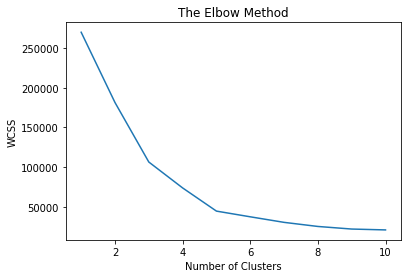

In [4]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The graph shows that the optimal number of clusters is $5$.

In [5]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

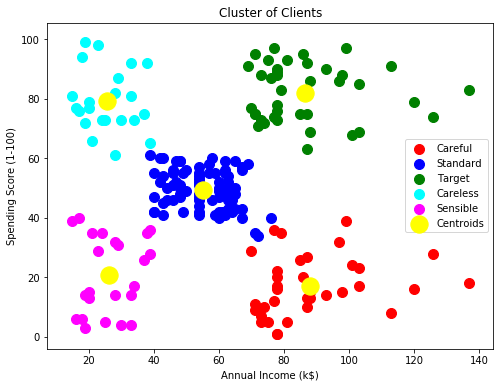

In [6]:
# Visualizing the clusters
plt.figure(figsize=[8, 6])
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 4.2 Hierachical Clustering (HC)
### 4.2.1 HC Intuition
**Agglomerative HC**:
- **STEP 1**: Make each data point a single-point cluster - That forms $N$ clusters
- **STEP 2**: Take the two closest data points and make them one cluster - That forms $N-1$ clusters
- **STEP 3**: Take the two closest clusters and make them one cluster - That forms $N-2$ clusters
- **STEP 4**: Repeat **STEP 3** until there is only one cluster

**How Do Dendograms Work?**: 

![4-2-1](4-2-1.png)

**Using Dendograms**:

A threshold can be set in the dendogram to limit the number of clusters. In order to find the optimal number of clusters, we need to find the longest vertical line which does not cross any extended horizontal line, which indicates the largest distance, and make a threshold across the this line.  

### 4.2.2 HC in Python
In HC, instead of minimizing the WCSS, we choose to minimize the variance by making `method='ward'`

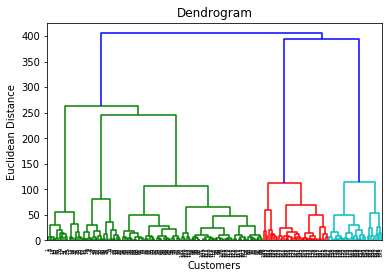

In [7]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

By observing the dendrogram above, we can find the optimal number of clusters is $5$.

In `AgglomerativeClustering`, we need to specify hyperparameters for this case:
- `n_clusters`: The number of clusters to find.
- `affinity`: Metric used to compute the linkage.
- `linkage`: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    - ward minimizes the variance of the clusters being merged.

In [8]:
# Fitting agglomerative HC to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

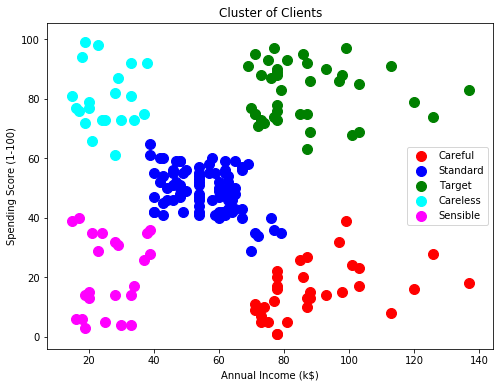

In [9]:
# Visualizing the clusters
plt.figure(figsize=[8, 6])
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Sensible')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 4.3 Conclusion
- K-Means:
    - Pros: Simple to understand, easily adaptable, works well on small or large datasets, fast, efficient and performant
    - Cons: Need to choose the number of clusters
- Hierarchical Clustering:
    - Pros: The optimal number of clusters can be obtained by the model itself, practical visualisation with the dendrogram
    - Cons: Not appropriate for large datasets